## Export conductivity model in NC format (for IRIS archive)

Load packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
# For plotting only
import cartopy.crs as ccrs
from matplotlib.colors import ListedColormap, LogNorm
import cartopy.feature as cf

%matplotlib inline

Open file and print header

In [4]:
ds = nc.Dataset("MECMUS-2022.r0.0.nc", 'r', format='NETCDF4')
print("-----------------------------------------------------------")
print(ds.title)
print(ds.id)
print(ds.short_description)
print(ds.data_revision)
print(ds.keywords)
print(ds.author_name)
print(ds.author_email)
print(ds.reference)
print("-----------------------------------------------------------")
print("Variables in file:")
for key in ds.variables.keys():
    print(key)


-----------------------------------------------------------
Multi-scale Electrical Conductivity Model of the United States
MECMUS-2022
The Multi-scale Electrical Conductivity Model of the United States (MECMUS-2022) was derived by inverting the full MT impedance tensor from 1291 USArray stations. The inversion procedure is described in "Munch, F. and Grayver, A. V., (2023). Multi-scale imaging of 3-D electrical conductivity structure under the contiguous US constrains lateral variations in the upper mantle water content, Earth and Planetary Science Letters"
r0.0
electrical conductivity, magnetotellurics, USArray, electromagnetic induction
Federico D. Munch & Alexander Grayver
federico.munch@erdw.ethz.ch / agrayver@uni-koeln.de
Munch, F. D. and Grayver, A. V., 2023, Multi-scale imaging of 3-D electrical conductivity structure under the contiguous US constrains lateral variations in the upper mantle water content. Earth and Planetary Science Letters.
-------------------------------------

Visualize active domain/survey area

/home/federico/anaconda3/envs/pythermo_3p8/lib/python3.8/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


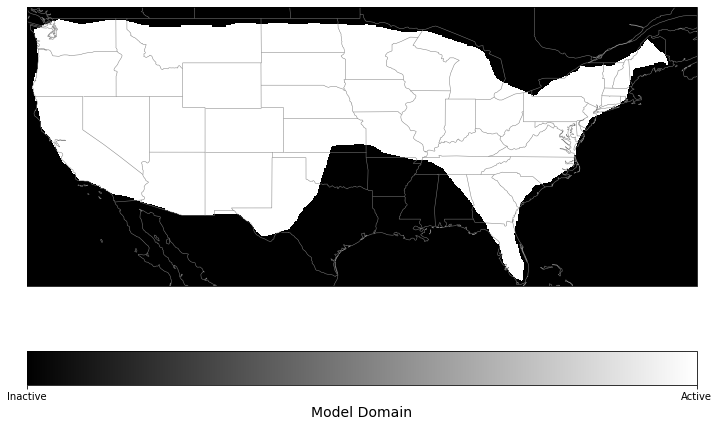

In [5]:
# Create basic map (Mercator projection)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines(color = 'gray', linewidth=0.5)
ax.add_feature(cf.BORDERS, color = 'gray', linewidth = 0.5)
states_provinces = cf.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
ax.add_feature(states_provinces, edgecolor='gray', linewidth=0.5)  
im = ax.pcolormesh(ds['longitude'], ds['latitude'],
              ds['active_domain'][:], cmap = "binary_r",
              vmin = 0, vmax = 1)
cbar = plt.colorbar(im, ticks = [0,1], orientation = "horizontal")
cbar.set_label("Model Domain",fontsize = 14)
cbar.ax.set_xticklabels(['Inactive', 'Active']) 
plt.show()


Visualize electrical conductivity

/home/federico/anaconda3/envs/pythermo_3p8/lib/python3.8/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


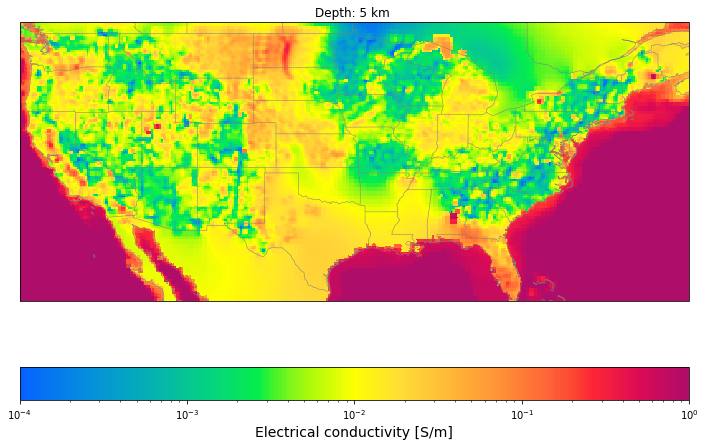

/home/federico/anaconda3/envs/pythermo_3p8/lib/python3.8/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


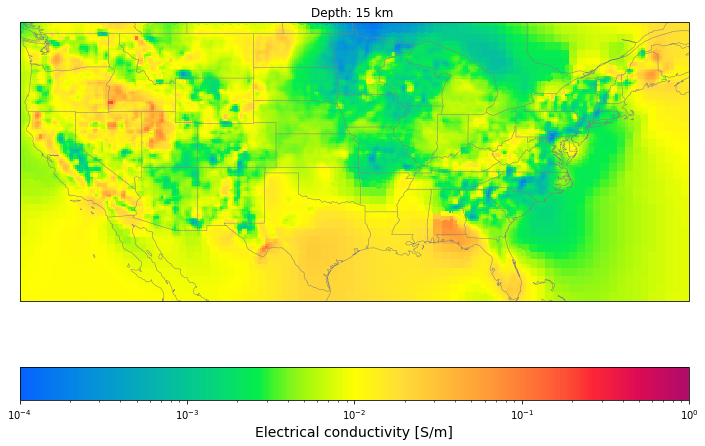

/home/federico/anaconda3/envs/pythermo_3p8/lib/python3.8/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


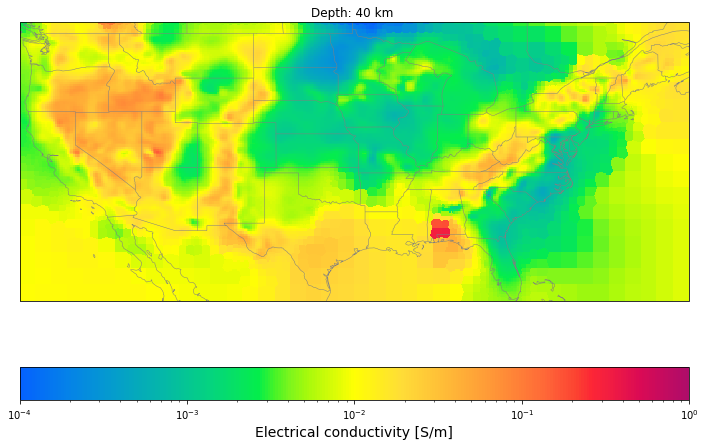

/home/federico/anaconda3/envs/pythermo_3p8/lib/python3.8/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


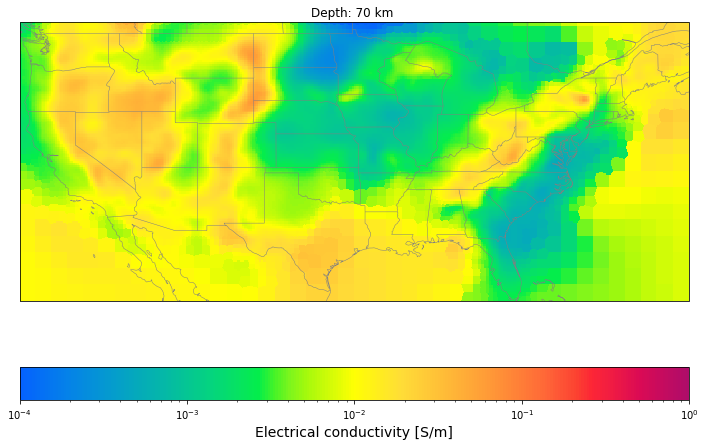

/home/federico/anaconda3/envs/pythermo_3p8/lib/python3.8/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


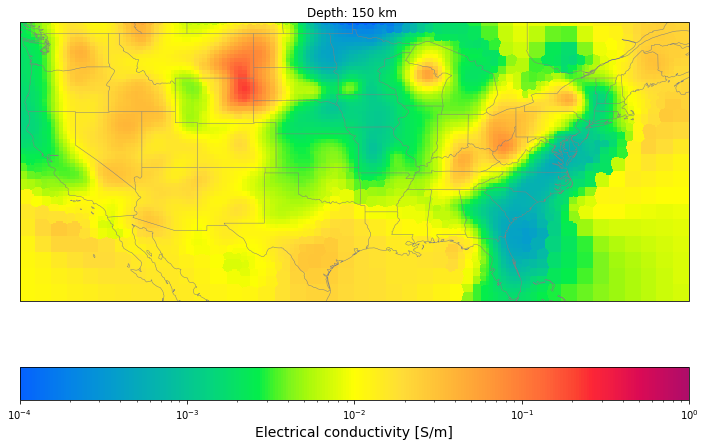

/home/federico/anaconda3/envs/pythermo_3p8/lib/python3.8/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


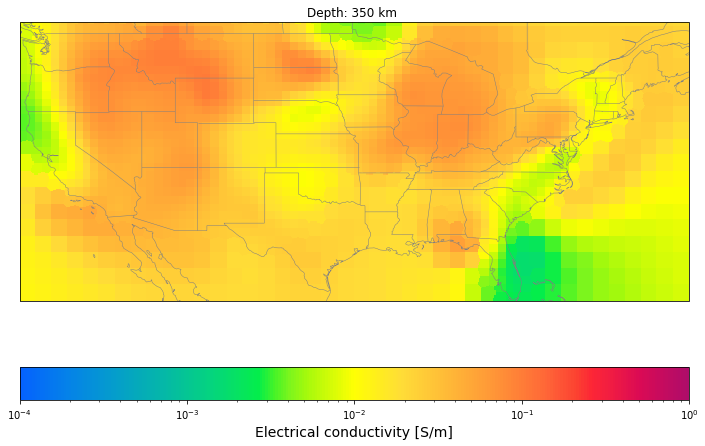

In [6]:
# Load colormap
list_of_colors = np.genfromtxt("cmap_MECMUS.txt")/255.
cmap0 = ListedColormap(colors=list_of_colors)

for depth in [5, 15, 40, 70, 150, 350]:
    
    #The conductivity is constant inside the cell, so we should find the cell center that is
    #closest to the depth of interest
    idx_depth = np.where( depth >= ds['depth_cell_edges'][:].data)[0][-1]
    
    # Create basic map
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    ax.coastlines(color = 'gray', linewidth=0.5)
    ax.add_feature(cf.BORDERS, color = 'gray', linewidth = 0.5)
    states_provinces = cf.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
    ax.add_feature(states_provinces, edgecolor='gray', linewidth=0.5)    
    im = ax.pcolormesh( ds['longitude'][:].data, ds['latitude'][:].data,
                        ds['sigma'][:].data[idx_depth,:,:],
                        norm = LogNorm(vmin=1e-4,vmax=1), cmap = cmap0,
                        transform=ccrs.PlateCarree(), shading='auto') 
    cbar = plt.colorbar(im, orientation = "horizontal")
    cbar.set_label("Electrical conductivity [S/m]", fontsize = 14)
    plt.title("Depth: %s km " % depth )
    #ax.set_extent([-125, -65, 25, 46]) 
    plt.show()                   